# Part I - (Flights data Exploration analysis)
## by (Daizy Asmani)

## Introduction

The "Reporting Carrier On-Time Performance Data" dataset provides detailed records of flight operations in the United States, covering the period from 1987 to 2020. It contains valuable information on airline carriers, flight schedules, delays, and cancellations.

The goal of this analysis is to investigate flight delays and cancellations, identify key contributing factors, and uncover patterns in flight performance. Specifically, we aim to answer the following key questions:

Research Questions
- What is the overall distribution of flight delays?

- What are the main reasons behind flight delays and cancellations?

- Which airlines experience the highest delays and cancellations?

- How do flight delays vary by month, day of the week, and time of day?

- Are there seasonal trends in flight delays and cancellations?

> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tarfile 
from os import path
import os


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

> Note that the collective size of all your files in the current worksapce **must not exceed 1 GB** in total. 


The dataset can be obtained for free from the IBM Developer Data Asset Exchange.

In [2]:
# Define filenames
fname = 'airline_2m.tar.gz'
data_path = "airline_2m.csv"
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/' + fname

In [3]:
# Check if the dataset is already extracted
if not os.path.exists(data_path):
    # Check if the compressed file exists before downloading
    if not os.path.exists(fname):
        print("Dataset not found. Downloading now...")
        r = requests.get(url, stream=True)
        with open(fname, 'wb') as file:
            file.write(r.content)
        print("Download complete.")
    else:
        print("Compressed dataset already exists. Skipping download.")
    # Extract the dataset
    with tarfile.open(fname, 'r:gz') as tar:
        tar.extractall()
else:
    print("Dataset already extracted. Skipping download and extraction.")

Dataset already extracted. Skipping download and extraction.


In [4]:
# Load the dataset using pandas
print("Loading dataset...")
df = pd.read_csv(data_path, encoding="ISO-8859-1",
                 dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str})

# Show first few rows
df.head() 

Loading dataset...


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#min year of dataset
df['Year'].min()

1987

In [6]:
#max year of dataset
df['Year'].max()

2020

In [7]:
# Assuming your dataframe is called df
# Ensure Year column is numeric (if it’s not already)
df['Year'] = pd.to_numeric(df['Year'])
#Filter data for the last 10 years
df_subset = df[df['Year'] >= 2010]  # Filter last 10 years (2010-2020)
df_subset.reset_index(drop=True, inplace=True)
# Display the result
df_subset.head()


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,2,6,11,2,2019-06-11,9E,20363,9E,N927XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,1,2,8,4,2018-02-08,WN,19393,WN,N8688J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,2,4,3,4,2014-04-03,WN,19393,WN,N374SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_subset.describe(include='all')

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
count,663197.000000,663197.000000,663197.000000,663197.000000,663197.000000,663197,663197,663197.000000,663197,660924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,3743,22,NaN,22,8932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,2019-07-22,WN,NaN,WN,N486HA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,264,130782,NaN,130782,410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2014.751403,2.469891,6.407309,15.723477,3.928487,NaN,NaN,19981.637357,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.049766,1.119990,3.444569,8.768870,1.992641,NaN,NaN,388.000972,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2010.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,19393.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2012.000000,1.000000,3.000000,8.000000,2.000000,NaN,NaN,19790.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2015.000000,2.000000,6.000000,16.000000,4.000000,NaN,NaN,19977.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2018.000000,3.000000,9.000000,23.000000,6.000000,NaN,NaN,20366.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#We check for missing data and drop columns with more than 50% missing values.

missing_percentage = (df_subset.isnull().sum() / len(df_subset)) * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
df_subset = df_subset.drop(columns=columns_to_drop)
df_subset.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
0,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,1900-1959,0.0,0.0,135.0,118.0,103.0,1.0,773.0,4,0.0
1,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,2000-2059,0.0,0.0,270.0,250.0,220.0,1.0,1979.0,8,0.0
2,2019,2,6,11,2,2019-06-11,9E,20363,9E,N927XJ,...,2000-2059,0.0,0.0,67.0,60.0,35.0,1.0,192.0,1,0.0
3,2018,1,2,8,4,2018-02-08,WN,19393,WN,N8688J,...,2200-2259,0.0,0.0,140.0,153.0,114.0,1.0,793.0,4,0.0
4,2014,2,4,3,4,2014-04-03,WN,19393,WN,N374SW,...,1300-1359,0.0,0.0,95.0,90.0,77.0,1.0,562.0,3,0.0


In [10]:
df_subset.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime',
       'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'DivAirportLandings'],
      

In [11]:
#Saveing subset dataset
df_subset.to_csv("airline_10y.csv", index=False)
print("airline 10 year of data saved")

airline 10 year of data saved


### What is the structure of your dataset?
The dataset contains:

> Flight Info: Temporal details, carrier info, flight identifiers, and origin/destination details.

> Flight Times: Scheduled and actual times, delay information, and additional timing features (e.g., taxi times, elapsed times).

> Flight Outcomes: Flags for cancellations and diversions.

> Distance and Groups: Flight distance and grouping.

> Delay Causes: Various delay reasons (e.g., carrier, weather, NAS).


### What is/are the main feature(s) of interest in your dataset?

I am particularly interested in:


> Flight Delays: DepDelay (departure delay), ArrDelay (arrival delay).

> Delay Causes: CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Scheduled vs. Actual Times: CRSDepTime, DepTime, CRSArrTime, ArrTime, DepDelay, ArrDelay.

> Flight Outcomes: Cancelled, Diverted.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Tip**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

1. What is the overall distribution of flight delays?

Plot: Histogram for Departure and Arrival Delays


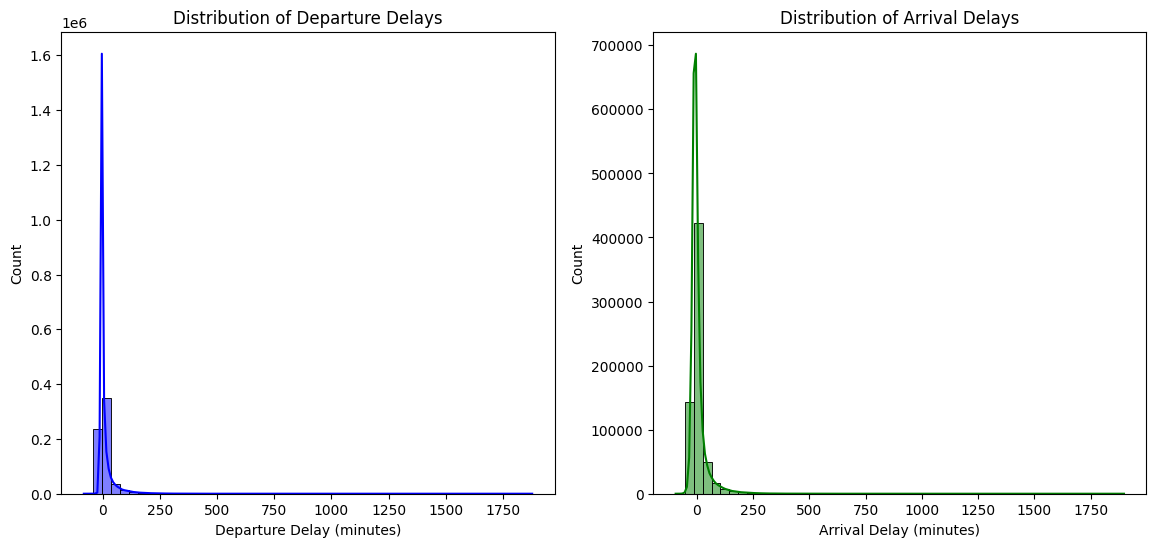

In [12]:
# Univariate analysis: Distribution of Flight Delays
plt.figure(figsize=(14, 6))

# Departure Delay Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_subset['DepDelay'], bins=50, kde=True, color='blue')
plt.title("Distribution of Departure Delays")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Count")

# Arrival Delay Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_subset['ArrDelay'], bins=50, kde=True, color='green')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Count")

plt.show()

Bar Chart for Departure and Arrival Delays (Grouped by Delay Categories)


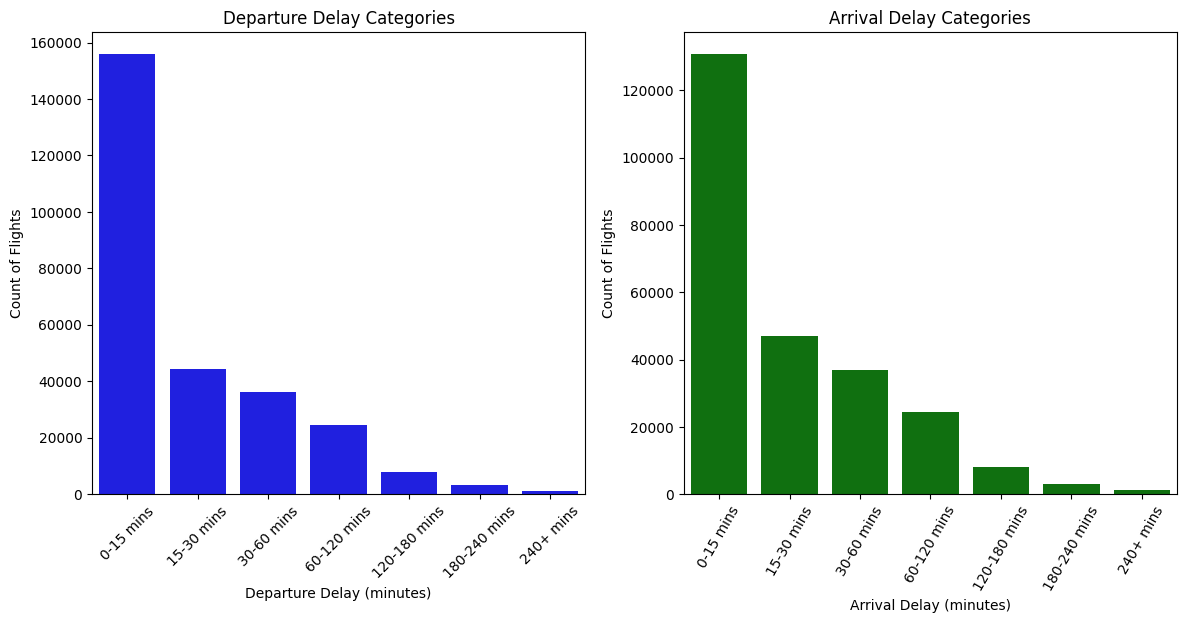

In [13]:
# Define bins for delays (e.g., 0-15 mins, 15-30 mins, etc.)
delay_bins = [0, 15, 30, 60, 120, 180, 240, 300]
delay_labels = ['0-15 mins', '15-30 mins', '30-60 mins', '60-120 mins', '120-180 mins', '180-240 mins', '240+ mins']

# Categorize Departure and Arrival Delays into bins
df_subset['DepDelayCategory'] = pd.cut(df_subset['DepDelay'], bins=delay_bins, labels=delay_labels, right=False)
df_subset['ArrDelayCategory'] = pd.cut(df_subset['ArrDelay'], bins=delay_bins, labels=delay_labels, right=False)

# Bar plot for Departure Delay Category
plt.figure(figsize=(14, 6))

# Departure Delay Bar Chart
plt.subplot(1, 2, 1)
sns.countplot(x='DepDelayCategory', data=df_subset, color='blue')
plt.title("Departure Delay Categories")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Count of Flights")
plt.xticks(rotation=45)

# Arrival Delay Bar Chart
plt.subplot(1, 2, 2)
sns.countplot(x='ArrDelayCategory', data=df_subset, color='green')
plt.title("Arrival Delay Categories")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Count of Flights")
plt.xticks(rotation=60)

plt.show()

Question 3: How many flights are canceled?

Visualization: Bar Chart of Flight Cancellations

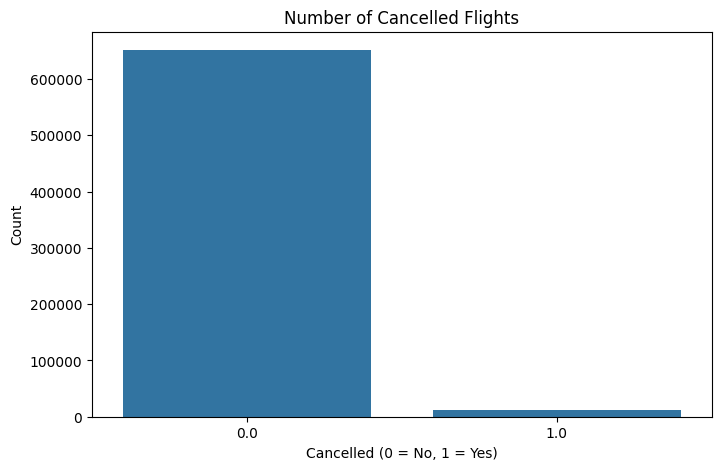

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cancelled', data=df_subset)
plt.xlabel("Cancelled (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Number of Cancelled Flights")
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Departure and Arrival Delays both show right-skewed distributions, with most flights having short delays and fewer with long delays. There may be extreme outliers (e.g., delays over 200 minutes), which could represent rare disruptions.

> Transformations: If needed, a log transformation could help normalize the data due to its skewed nature.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I categorized delays into bins (e.g., 0-15 minutes, 15-30 minutes) to simplify the analysis and make trends clearer.

> Cancelled Flights show an imbalance, with most flights not being cancelled. Outliers or extreme delays may need further investigation for accuracy or to understand the causes

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

1. Departure Delay by Month, Departure Delay by Day of Week, and Departure Delay by Time of Day

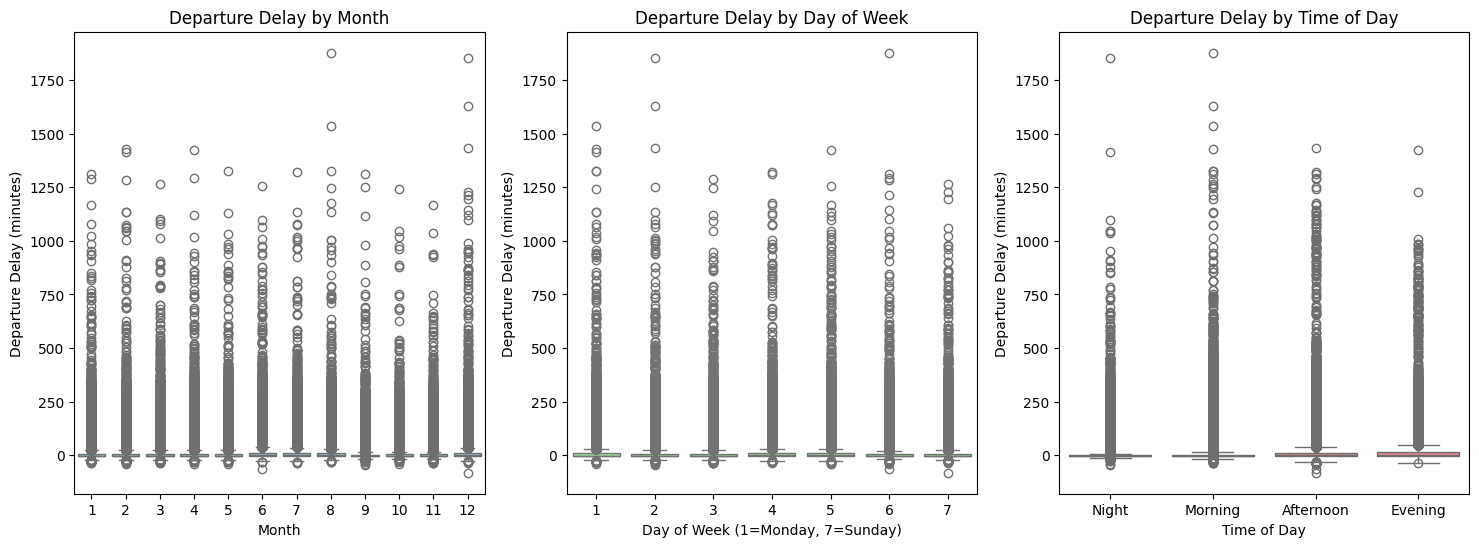

In [15]:
# Convert 'CRSDepTime' to a datetime object if not already in the correct format.
# Creating 'TimeOfDay' based on the hour of departure
df_subset['CRSDepTime'] = pd.to_datetime(df_subset['CRSDepTime'], format='%H%M', errors='coerce')  # Assuming CRSDepTime is in HHMM format
df_subset['HourOfDay'] = df_subset['CRSDepTime'].dt.hour
df_subset['TimeOfDay'] = pd.cut(df_subset['HourOfDay'], bins=[0, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])

# Creating the plot with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Departure Delay by Month
sns.boxplot(x='Month', y='DepDelay', data=df_subset, ax=axes[0], color='skyblue')
axes[0].set_title("Departure Delay by Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Departure Delay (minutes)")

# Departure Delay by Day of Week
sns.boxplot(x='DayOfWeek', y='DepDelay', data=df_subset, ax=axes[1], color='lightgreen')
axes[1].set_title("Departure Delay by Day of Week")
axes[1].set_xlabel("Day of Week (1=Monday, 7=Sunday)")
axes[1].set_ylabel("Departure Delay (minutes)")

# Departure Delay by Time of Day
sns.boxplot(x='TimeOfDay', y='DepDelay', data=df_subset, ax=axes[2], color='lightcoral')
axes[2].set_title("Departure Delay by Time of Day")
axes[2].set_xlabel("Time of Day")
axes[2].set_ylabel("Departure Delay (minutes)")

plt.show()


2. Which airlines experience the highest delays and cancellations?

Plot: Average Departure Delay by Airline


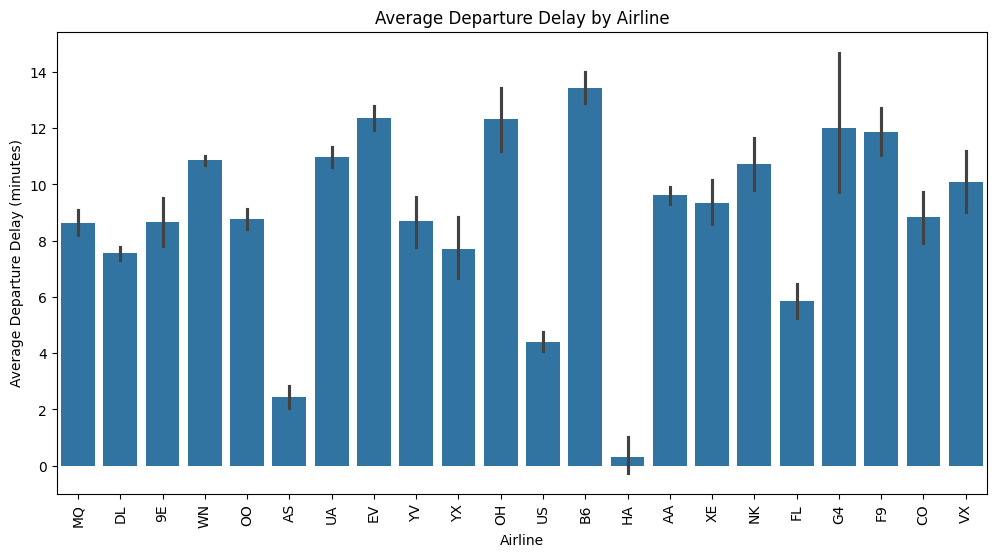

In [16]:
# Average Departure Delay by Airline
plt.figure(figsize=(12, 6))
sns.barplot(x='Reporting_Airline', y='DepDelay', data=df_subset, estimator=np.mean)
plt.title("Average Departure Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(rotation=90)
plt.show()

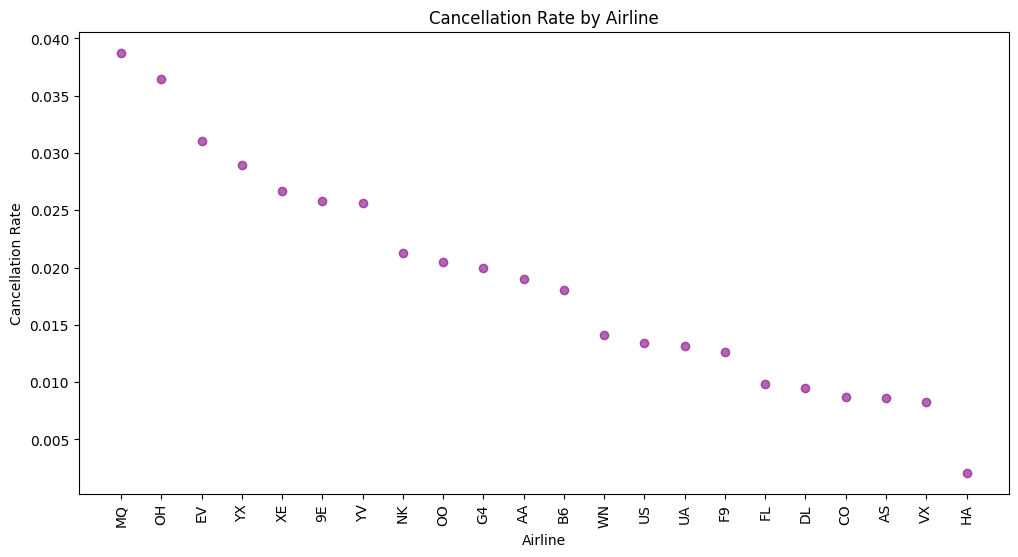

In [17]:
# Calculate cancellation rate by airline
airline_cancellation_rate = df_subset.groupby('Reporting_Airline')['Cancelled'].mean().sort_values(ascending=False)

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x=airline_cancellation_rate.index, y=airline_cancellation_rate.values, color='purple', alpha=0.6)

# Set plot labels and title
plt.xlabel("Airline")
plt.ylabel("Cancellation Rate")
plt.title("Cancellation Rate by Airline")
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Departure Delay by Month: Variations in delays across months, possibly due to seasonal weather or holidays.

> Departure Delay by Day of Week: Some days, like Mondays or Fridays, show higher delays due to traffic.

> Departure Delay by Time of Day: Morning and evening flights tend to have more delays, likely due to peak congestion.

> Average Departure Delay by Airline: Different airlines show varying delays, which could be tied to operational practices or routes.

> Cancellation Rate by Airline: Airlines have different cancellation rates, potentially due to fleet size or external factors.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Airline vs. Cancellation Rate: Some airlines have higher cancellation rates, possibly due to operational challenges.

> Time of Day and Departure Delays: Evening and morning flights tend to have more delays, likely due to airport congestion during peak hours.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

1. Facet Plot: Departure Delay by Airline, Day of Week, and Cancellation Status

 Facet Plot: Departure Delay by Airline, Day of Week, and Cancellation Status


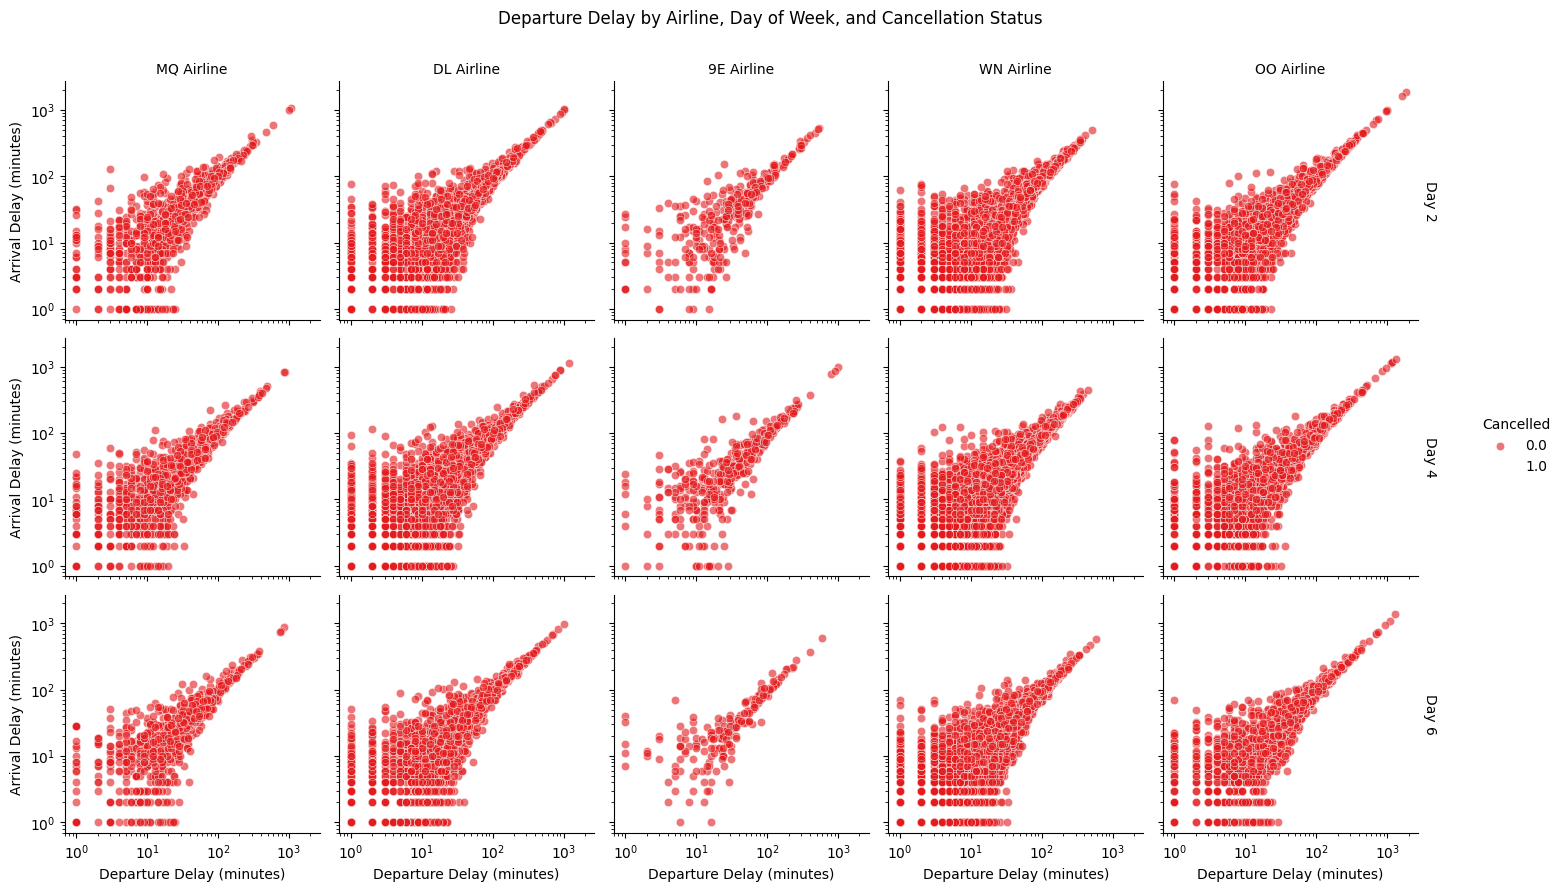

In [18]:
# Limit the number of airlines and days for faster plotting
selected_airlines = df_subset['Reporting_Airline'].unique()[:5]  # Select top 5 airlines
selected_days = df_subset['DayOfWeek'].unique()[:3]  # Select top 3 days
df_subset_small = df_subset[df_subset['Reporting_Airline'].isin(selected_airlines) & df_subset['DayOfWeek'].isin(selected_days)]
g = sns.FacetGrid(df_subset_small, col="Reporting_Airline", row="DayOfWeek", hue="Cancelled", margin_titles=True, palette='Set1')
g.map(sns.scatterplot, "DepDelay", "ArrDelay", alpha=0.6)
g.add_legend()
g.set_axis_labels("Departure Delay (minutes)", "Arrival Delay (minutes)")
g.set_titles(col_template="{col_name} Airline", row_template="Day {row_name}")
plt.subplots_adjust(top=0.9)
plt.xscale('log')
plt.yscale('log')
g.fig.suptitle('Departure Delay by Airline, Day of Week, and Cancellation Status')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Delays by Airline and Day of Week: Airlines show consistent delay patterns across days, with some having tighter delay clusters while others have a wider spread.

> Cancellation and Delays: Flights with extreme delays are more likely to be cancelled, reinforcing that major delays lead to cancellations.

> Airline and Day of Week: Some airlines experience more delays on specific days, which could be influenced by factors like route demand or airport congestion.

### Were there any interesting or surprising interactions between features?

> Cancellation and Delays: Extreme delays are strongly linked to cancellations, especially on certain days.

> Day of Week and Airline Performance: Airlines perform differently on certain days, suggesting operational factors like traffic or scheduling issues.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> **Rubric Tip**: Create a list of summary findings to make it easy to review.

> Flight delays showed a heavily skewed distribution, with most flights experiencing minimal delays while a smaller portion faced long delays. Categorizing delays revealed that the majority fell within the 0-15 minute range.

> Delays varied by day and time, with Mondays and Fridays experiencing more delays, likely due to higher traffic. Flights during peak hours, such as mornings and evenings, also faced higher delays due to congestion.

> Airline performance varied, with some airlines consistently experiencing more departure delays than others. Additionally, certain airlines had significantly higher cancellation rates, possibly due to operational challenges or external factors like weather.

There was a clear relationship between long delays and cancellations, as flights with extreme delays were more likely to be canceled. Some airlines also exhibited higher cancellation rates on specific days.

Data cleaning and preparation involved handling missing values, categorizing flight delays for better interpretation, and limiting the dataset to a smaller set of airlines and days for more efficient analysis.

Visualizations, including FacetGrid and scatter plots, effectively highlighted patterns in delays and cancellations. The use of distinct colors improved the differentiation between canceled and non-canceled flights, making trends easier to interpret.

## Reflection

> This investigation allowed us to explore the relationships between various flight characteristics, delays, and cancellations, and uncover patterns related to airlines, days of the week, and operational efficiency. The data exploration process involved thoughtful data cleaning and visualization techniques, which helped reveal meaningful insights about the patterns in the flight dataset.

> Next steps would involve performing more advanced statistical analysis to confirm causal relationships, as well as developing predictive models to forecast delays and cancellations based on historical data.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

